<a href="https://colab.research.google.com/github/tankien76/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thêm các thư viện numpy, pandas, sklearn cần sử dụng 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Lấy dữ liệu từ link:http://cs.uit.edu.vn/data3.txt chia dữ liệu thành 2 features: "Input", "Runtime" bằng thư viện pandas

In [23]:
dataset = pd.read_csv("http://cs.uit.edu.vn/data3.txt",sep = " ",delimiter= ",")
dataset.columns=["Input","Runtime"]

Ta thấy dataset của round 3 ít hơn dataset ở round 2

In [24]:
dataset

,Input,Runtime
0,37395246,3.92089
1,36610827,3.21540
2,29555651,2.54506
3,25928216,2.21831
4,30423112,2.61376
...,...,...
10584,26872494,2.35117
10585,20753811,1.79155
10586,33520323,2.90918
10587,21243264,1.80292


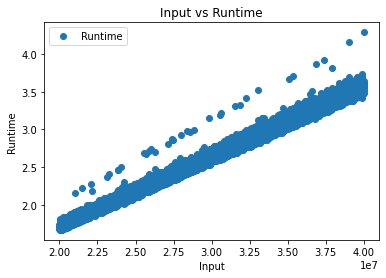

In [25]:
dataset.plot(x='Input', y='Runtime', style='o')  
plt.title('Input vs Runtime')  
plt.xlabel('Input')  
plt.ylabel('Runtime')  
plt.show()

In [7]:
X = dataset['Input'].values.reshape(-1,1)
Y = dataset['Runtime'].values.reshape(-1,1)

Tách dự liệu thành 2 phần train và test, phần train chiếm **70%**, test chiếm **30%**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Sử dụng model LinearRegresstion để train dữ liệu bằng hàm .fit

In [9]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
Y_pred = LR.predict(X_test)

Xuất ra thời gian thức tế so với thời gian được tiên đoán thành 2 cột tương ứng Actual và Predicted

In [11]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,2.39698,2.475486
1,2.66026,2.706649
2,2.75597,2.752064
3,2.90832,2.859824
4,1.94031,1.990167
...,...,...
3172,2.81642,2.756039
3173,3.23221,3.241337
3174,1.93803,1.978150
3175,2.37918,2.377785


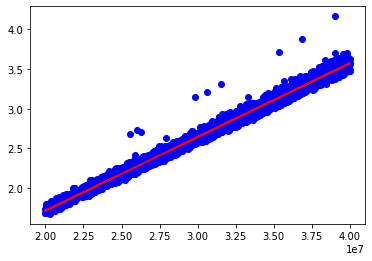

In [12]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

Mean Squared Error trong round 3 tăng lên so với round 2 cho thấy kết quả thấp hơn so với model ở round 2 vì dữ liệu ở round 3 ít hơn so với dự liệu ở round 2 nên độ chính xác thấp hơn

In [13]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print("Train: ",LR.score(X_train,Y_train))
print("Test: ",LR.score(X_test,Y_test))

Mean Squared Error: 0.0033291629131854926
Train:  0.9883166757252524
Test:  0.9884508838172608


# Add features

Tăng thêm 2 feature vào trong dataset là Input2 ứng với x mũ 2 và log2 của x

In [26]:
import math
df=pd.DataFrame(dataset)
Input2=df['Input']**2
Inputlog=[df['Input'][i]*math.log2(df['Input'][i]) for i in range(len(dataset))]
df['Input2']=Input2
df['Inputlog']=Inputlog

In [27]:
dataset.head()

,Input,Runtime,Input2,Inputlog
0,37395246,3.92089,1398404423400516,9.407280e+08
1,36610827,3.21540,1340352653623929,9.198751e+08
2,29555651,2.54506,873536506033801,7.334805e+08
3,25928216,2.21831,672272384942656,6.385606e+08
4,30423112,2.61376,925565743764544,7.562779e+08


In [16]:
X = dataset[['Input','Input2','Inputlog']]
Y = dataset['Runtime'].values.reshape(-1,1)

Tách dự liệu thành 2 phần train và test, phần train chiếm **70%**, test chiếm **30%**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Sử dụng model LinearRegresstion để train dữ liệu bằng hàm .fit

In [18]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
Y_pred = LR.predict(X_test)

Xuất ra thời gian thức tế so với thời gian được tiên đoán thành 2 cột Actual và Predicted

In [20]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,2.39698,2.472646
1,2.66026,2.703255
2,2.75597,2.748712
3,2.90832,2.856783
4,1.94031,1.992021
...,...,...
3172,2.81642,2.752693
3173,3.23221,3.241965
3174,1.93803,1.980168
3175,2.37918,2.375538


Model mới có performent tốt hơn một ít so với model cũ khi Mean Squared Error giảm từ 0,003329 -> 0,003320

Sự khác biệt khi tăng thêm số lượng feature trong data làm tăng thêm khả năng chính xác của model

In [21]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print("Train: ",LR.score(X_train,Y_train))
print("Test: ",LR.score(X_test,Y_test))

Mean Squared Error: 0.0033205998985766857
Train:  0.988347935866094
Test:  0.9884805895580643
